In [83]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [84]:
#Get URL

w_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(w_url)

response.status_code

200

In [85]:
cmhf_1 = BeautifulSoup(response.content, 'lxml')
print(cmhf_1.title)
print(cmhf_1)

<title>Hall of Fame Members | Country Music Hall of Fame</title>
<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports

In [86]:
vcards_t = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--title'})
vcards_t

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [87]:
vcards_c = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
vcards_c[0].get_text()

'\n\n                    Inducted 1962                  \n'

In [88]:
artists = []
for i in range(len(vcards_t)):
    name = vcards_t[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [89]:
inducted = []
for i in range(len(vcards_c)):
    ind = vcards_c[i].get_text().replace("\n", "").strip()
    year = re.sub("[^0-9]", "", ind)
    inducted.append(year)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [90]:
cmfa1_tuples = list(zip(artists, inducted))
cmfa1_df = pd.DataFrame(cmfa1_tuples, columns = ["artist", "year_inducted"])
print(cmfa1_df)

          artist year_inducted
0      Roy Acuff          1962
1        Alabama          2005
2  Bill Anderson          2001
3    Eddy Arnold          1966
4    Chet Atkins          1973
5     Gene Autry          1969
6  DeFord Bailey          2005
7     Bobby Bare          2013
8    Johnny Bond          1999


In [91]:
url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
artists = []
inducted = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    page_html = BeautifulSoup(response.content, 'lxml')
    vcards_t = page_html.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    vcards_c = page_html.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    for i in range(len(vcards_t)):
        name = vcards_t[i].get_text().replace("\n", "")
        artists.append(name)
    for i in range(len(vcards_c)):
        ind = vcards_c[i].get_text().replace("\n", "").strip()
        year = re.sub("[^0-9]", "", ind)
        inducted.append(year)
        
print(artists)
print(inducted)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [93]:
cmhf_tuples = list(zip(artists, inducted))
cmhf_df = pd.DataFrame(cmhf_tuples, columns = ["artist", "year_inducted"])
print(cmhf_df)
cmhf_df['year_inducted'] = cmhf_df['year_inducted'].astype('int')

            artist year_inducted
0        Roy Acuff          1962
1          Alabama          2005
2    Bill Anderson          2001
3      Eddy Arnold          1966
4      Chet Atkins          1973
..             ...           ...
135  Hank Williams          1961
136      Bob Wills          1968
137    Mac Wiseman          2014
138  Tammy Wynette          1998
139    Faron Young          2000

[140 rows x 2 columns]


(array([16., 15., 20., 21., 36., 32.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

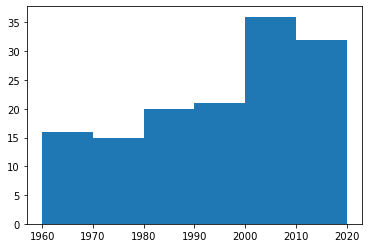

In [97]:
plt.hist(cmhf_df.year_inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020])